In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03a_wn_540_620',
                          'P_50_T_250',
                          'min_1.e-24_max_1.e-19_ng_6',
                          'wgt_1_.7_.6_.5_.4_.3',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'co2',
                               'band03a_wn_540_620',
                               'P_50_T_250',
                               'min_1.e-24_max_1.e-19_ng_6',
                               'wgt_1_.7_.6_.5_.4_.3',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [10]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [11]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [12]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [13]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [14]:
fig.display_hrefanchor()

In [15]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [16]:
table_dgdgs.display_hrefanchor()

In [17]:
for g in [1, 2, 3, 4, 5, 6,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

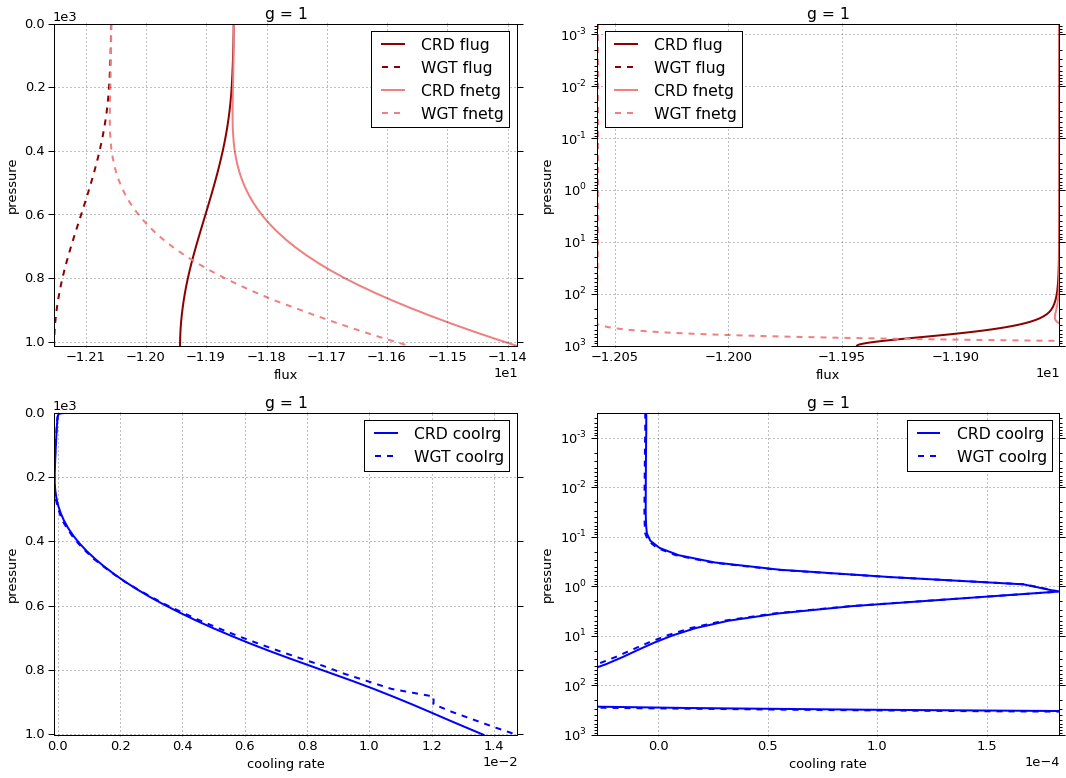

# Figure: flux, cooling rate. g-group 2

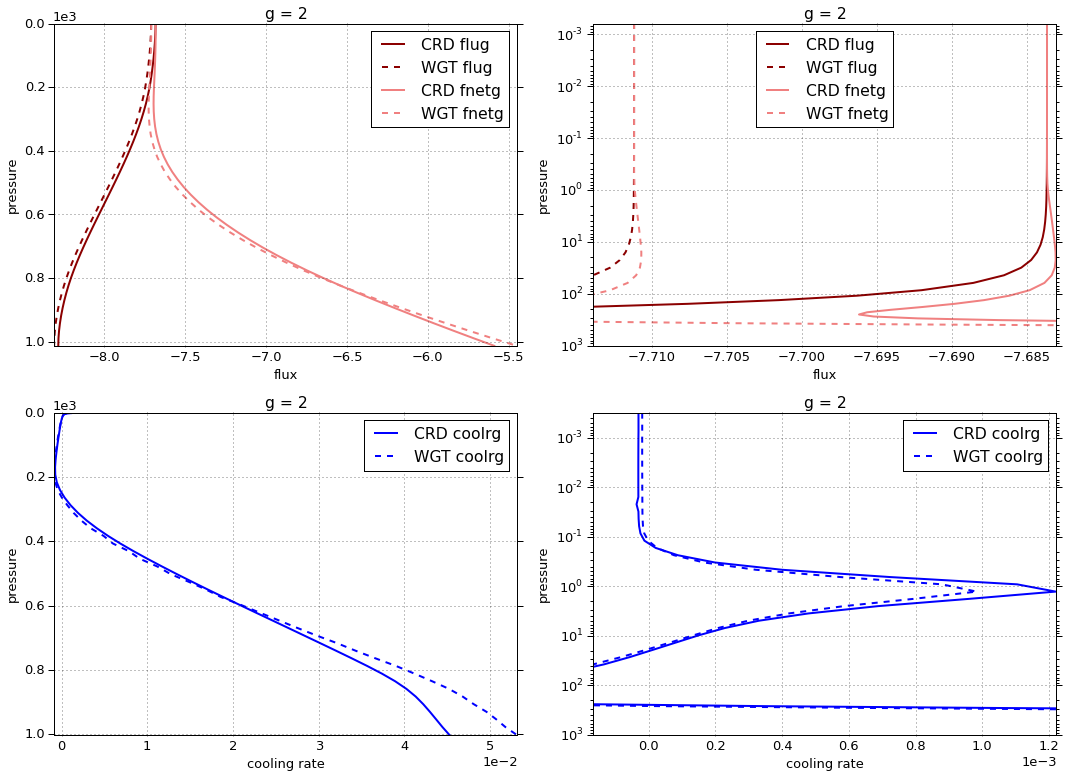

# Figure: flux, cooling rate. g-group 3

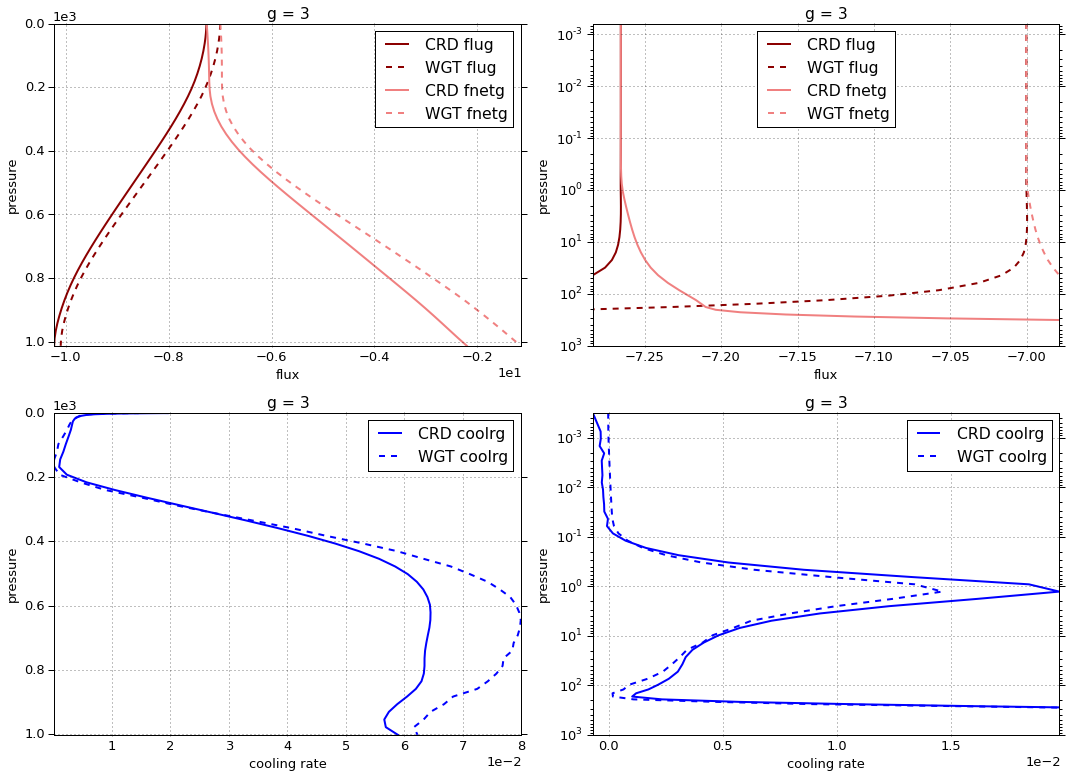

# Figure: flux, cooling rate. g-group 4

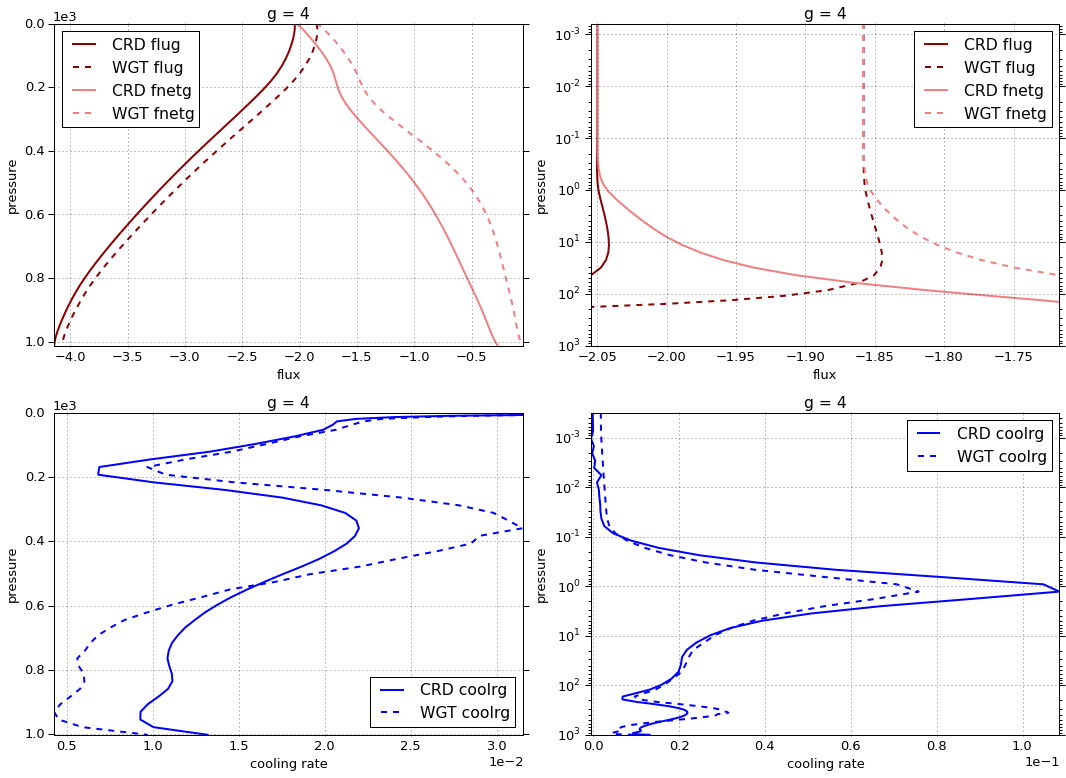

# Figure: flux, cooling rate. g-group 5

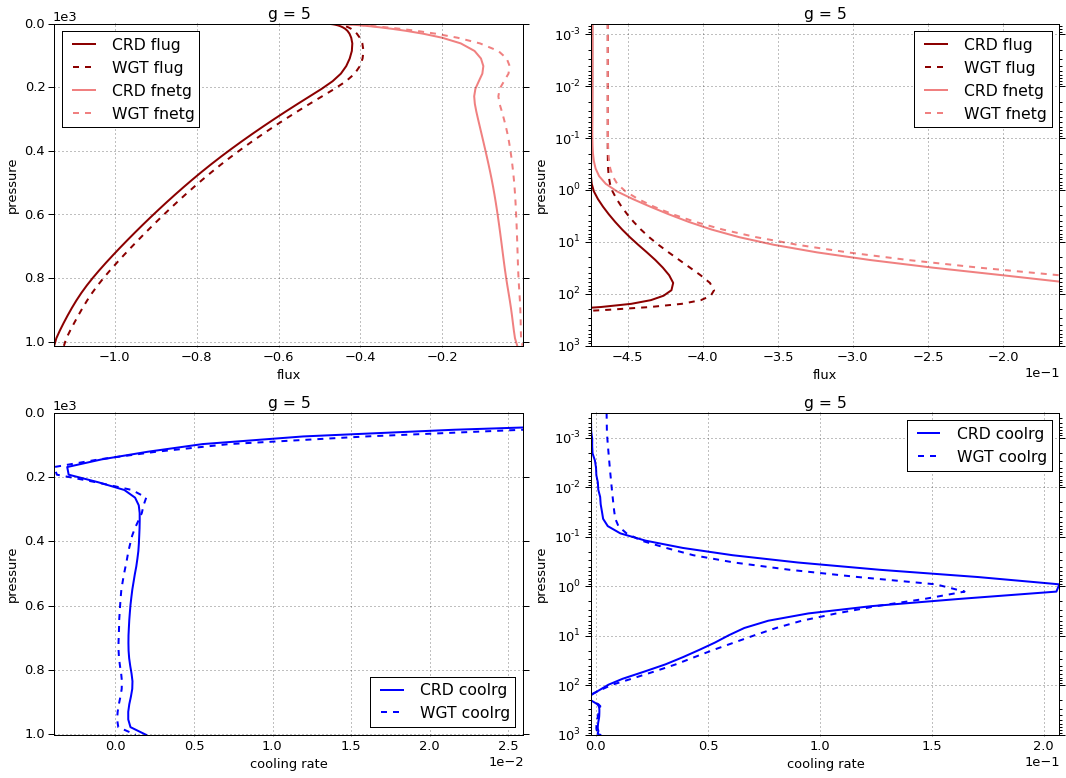

# Figure: flux, cooling rate. g-group 6

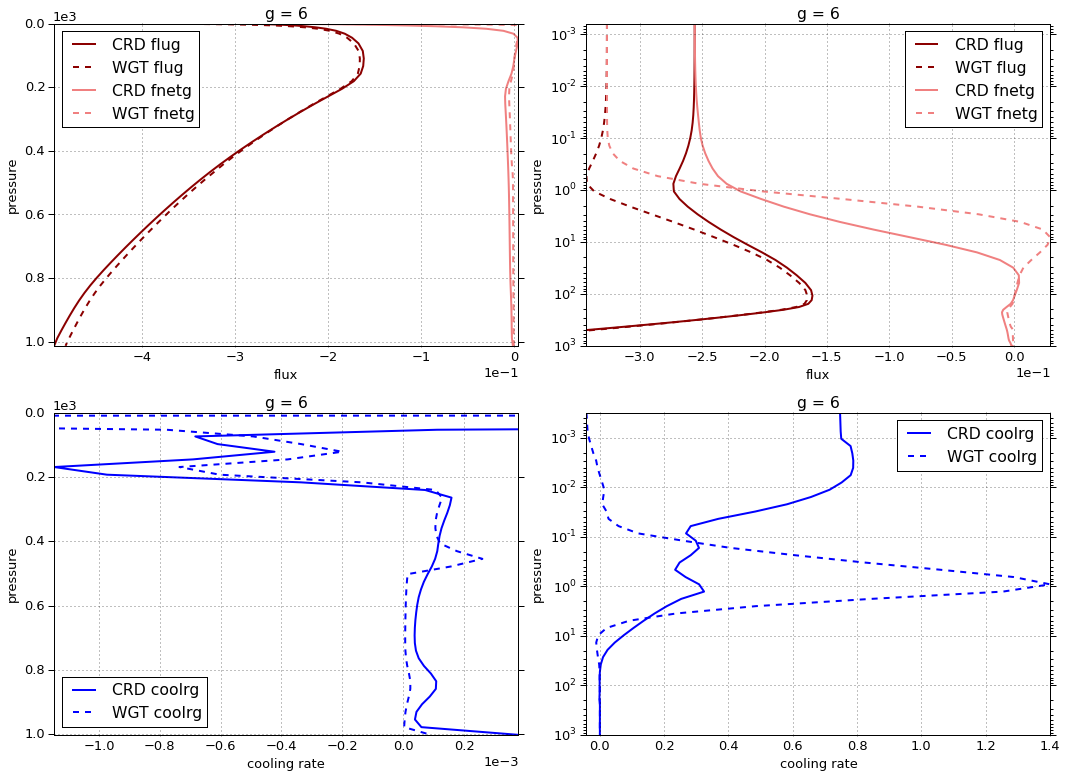

# Figure: flux, cooling rate. g-group total

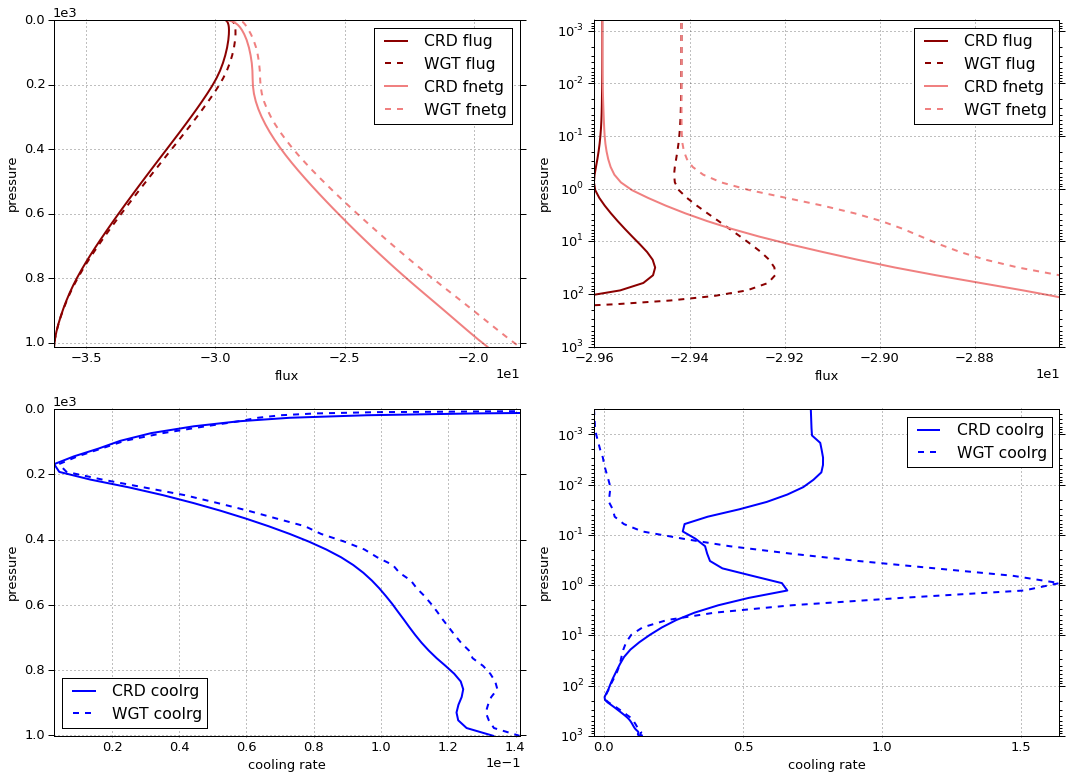

In [18]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [19]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -11.854432  0.000000 -11.854432
  1013     76    -11.943454  0.558289 -11.385166
2 0        1      -7.683680  0.000000  -7.683680
  1013     76     -8.285278  2.694954  -5.590324
3 0        1      -7.265643  0.000000  -7.265643
  1013     76    -10.223686  8.018925  -2.204761
4 0        1      -2.049862  0.000000  -2.049862
  1013     76     -4.139936  3.867428  -0.272508
5 0        1      -0.473768  0.000000  -0.473768
  1013     76     -1.148467  1.131596  -0.016871
6 0        1      -0.255977  0.000000  -0.255977
  1013     76     -0.494597  0.493335  -0.001262


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.057628  0.000000 -12.057628
  1013     76    -12.152168  0.587725 -11.564444
2 0        1      -7.711195  0.000000  -7.711195
  1013     76     -8.310794  2.858858  -5.451937
3 0        1      -7.000257  0.000000  -7.000257
  1013     76    -10.096432  8.939901  -1.156531
4 0        1      -1.858052  0.000000  -1.858052
  1013     76     -4.069017  4.013262  -0.055754
5 0        1      -0.463454  0.000000  -0.463454
  1013     76     -1.124644  1.120720  -0.003924
6 0        1      -0.326274  0.000000  -0.326274
  1013     76     -0.482364  0.482111  -0.000253


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.203196  0.000000 -0.203196
  1013     76    -0.208714  0.029436 -0.179278
2 0        1     -0.027514  0.000000 -0.027514
  1013     76    -0.025516  0.163903  0.138387
3 0        1      0.265386  0.000000  0.265386
  1013     76     0.127254  0.920976  1.048230
4 0        1      0.191810  0.000000  0.191810
  1013     76     0.070920  0.145834  0.216753
5 0        1      0.010314  0.000000  0.010314
  1013     76     0.023823 -0.010876  0.012947
6 0        1     -0.070297  0.000000 -0.070297
  1013     76     0.012234 -0.011224  0.001009

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000005
  1001.112500 75     0.013661
2 0.000312    1     -0.000030
  1001.112500 75     0.045233
3 0.000312    1     -0.000701
  1001.112500 75     0.058925
4 0.000312    1     -0.000091
  1001.112500 75     0.013192
5 0.000312    1     -0.002212
  1001.112500 75     0.001955
6 0.000312    1      0.747050
  1001.112500 75     0.000378


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000006
  1001.112500 75     0.014727
2 0.000312    1     -0.000019
  1001.112500 75     0.053086
3 0.000312    1     -0.000022
  1001.112500 75     0.062288
4 0.000312    1      0.001798
  1001.112500 75     0.009701
5 0.000312    1      0.004777
  1001.112500 75     0.001293
6 0.000312    1     -0.041775
  1001.112500 75     0.000091


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -4.577267e-07
  1001.112500 75     1.065792e-03
2 0.000312    1      1.115143e-05
  1001.112500 75     7.853258e-03
3 0.000312    1      6.790468e-04
  1001.112500 75     3.362558e-03
4 0.000312    1      1.888983e-03
  1001.112500 75    -3.491040e-03
5 0.000312    1      6.988469e-03
  1001.112500 75    -6.622113e-04
6 0.000312    1     -7.888256e-01
  1001.112500 75    -2.867633e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.583362,0.000000,-29.583362
1013,76,-36.235419,16.764528,-19.470891



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.416860,0.000000,-29.416860
1013,76,-36.235419,18.002576,-18.232843



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.665023e-01,0.000000,0.166502
1013,76,9.999994e-09,1.238048,1.238048


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.744012
1001.112500,75,0.133344



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.035247
1001.112500,75,0.141185



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.779258
1001.112500,75,0.007842


In [20]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.329562,0.335367
2,0.228375,0.229356
3,0.282250,0.278634
4,0.114375,0.112294
5,0.031750,0.031037
6,0.013688,0.013312


In [21]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -11.854432  0.000000e+00 -11.854432   1     1   
0.000624      1     2 -11.854432  3.718997e-10 -11.854432   1     2   
0.000876      1     3 -11.854432  5.242839e-10 -11.854432   1     3   
0.001229      1     4 -11.854432  7.448218e-10 -11.854432   1     4   
0.001723      1     5 -11.854432  1.065324e-09 -11.854432   1     5   
0.002417      1     6 -11.854432  1.531089e-09 -11.854432   1     6   
0.003391      1     7 -11.854432  2.208034e-09 -11.854432   1     7   
0.004757      1     8 -11.854432  3.191947e-09 -11.854432   1     8   
0.006672      1     9 -11.854432  4.621969e-09 -11.854432   1     9   
0.009359      1    10 -11.854432  6.700505e-09 -11.854432   1    10   
0.013128      1    11 -11.854432  9.721785e-09 -11.854432   1    11   
0.018415      1    12 -11.854432  1.411381e-08 -11.854432   1    12   
0.025830      1    13 -11.854432  2.049924e-08 -11.854432   1    13   
0.036232      1    14 -11.854432  2.978590e-08 -11.854432   1    14   
0.050823      1    15 -11.854432  4.337922e-08 -11.854432   1    15   
0.071291      1    16 -11.854432  6.481646e-08 -11.854432   1    16   
0.100000      1    17 -11.854432  1.050487e-07 -11.854432   1    17   
0.140271      1    18 -11.854432  1.902742e-07 -11.854432   1    18   
0.196760      1    19 -11.854432  3.742056e-07 -11.854432   1    19   
0.275997      1    20 -11.854433  7.725727e-07 -11.854432   1    20   
0.387100      1    21 -11.854433  1.637112e-06 -11.854431   1    21   
0.543100      1    22 -11.854434  3.518023e-06 -11.854430   1    22   
0.761700      1    23 -11.854435  7.580905e-06 -11.854428   1    23   
1.068500      1    24 -11.854437  1.557999e-05 -11.854422   1    24   
1.498800      1    25 -11.854440  2.748110e-05 -11.854412   1    25   
2.102400      1    26 -11.854444  4.090908e-05 -11.854403   1    26   
2.949000      1    27 -11.854449  5.506723e-05 -11.854394   1    27   
4.136600      1    28 -11.854456  7.001214e-05 -11.854386   1    28   
5.802500      1    29 -11.854466  8.623797e-05 -11.854380   1    29   
8.139200      1    30 -11.854480  1.047351e-04 -11.854375   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -11.864981  8.934048e-03 -11.856047   1    47   
347.300000    1    48 -11.867103  1.162273e-02 -11.855480   1    48   
371.075000    1    49 -11.869462  1.493305e-02 -11.854529   1    49   
394.850000    1    50 -11.872050  1.894314e-02 -11.853106   1    50   
418.625000    1    51 -11.874852  2.372874e-02 -11.851123   1    51   
442.400000    1    52 -11.877853  2.936373e-02 -11.848490   1    52   
466.175000    1    53 -11.881034  3.591763e-02 -11.845117   1    53   
489.950000    1    54 -11.884375  4.345475e-02 -11.840920   1    54   
513.725000    1    55 -11.887852  5.203634e-02 -11.835816   1    55   
537.500000    1    56 -11.891444  6.172797e-02 -11.829716   1    56   
561.275000    1    57 -11.895124  7.259404e-02 -11.822530   1    57   
585.050000    1    58 -11.898867  8.468970e-02 -11.814177   1    58   
608.825000    1    59 -11.902645  9.808857e-02 -11.804556   1    59   
632.600000    1    60 -11.906428  1.128548e-01 -11.793573   1    60   
656.375000    1    61 -11.910186  1.290247e-01 -11.781161   1    61   
680.150000    1    62 -11.913886  1.466692e-01 -11.767217   1    62   
703.925000    1    63 -11.917495  1.658485e-01 -11.751647   1    63   
727.700000    1    64 -11.920978  1.865951e-01 -11.734383   1    64   
751.475000    1    65 -11.924300  2.089630e-01 -11.715337   1    65   
775.250000    1    66 -11.927424  2.330027e-01 -11.694422   1    66   
799.025000    1    67 -11.930318  2.587386e-01 -11.671580   1    67   
822.800000    1    68 -11.932953  2.861515e-01 -11.646802   1    68   
846.575000    1    69 -11.935310  3.

In [22]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -7.683680  0.000000e+00 -7.683680   2     1 -7.711195   
0.000624      2     2 -7.683680  2.418095e-09 -7.683680   2     2 -7.711195   
0.000876      2     3 -7.683680  3.409344e-09 -7.683680   2     3 -7.711195   
0.001229      2     4 -7.683680  4.844901e-09 -7.683680   2     4 -7.711195   
0.001723      2     5 -7.683680  6.932731e-09 -7.683680   2     5 -7.711195   
0.002417      2     6 -7.683680  9.969135e-09 -7.683680   2     6 -7.711195   
0.003391      2     7 -7.683680  1.438565e-08 -7.683680   2     7 -7.711195   
0.004757      2     8 -7.683680  2.080999e-08 -7.683680   2     8 -7.711195   
0.006672      2     9 -7.683680  3.015506e-08 -7.683680   2     9 -7.711195   
0.009359      2    10 -7.683680  4.375081e-08 -7.683680   2    10 -7.711195   
0.013128      2    11 -7.683680  6.353411e-08 -7.683680   2    11 -7.711195   
0.018415      2    12 -7.683680  9.232931e-08 -7.683680   2    12 -7.711195   
0.025830      2    13 -7.683680  1.342586e-07 -7.683680   2    13 -7.711195   
0.036232      2    14 -7.683680  1.953577e-07 -7.683680   2    14 -7.711195   
0.050823      2    15 -7.683681  2.850278e-07 -7.683680   2    15 -7.711195   
0.071291      2    16 -7.683681  4.269587e-07 -7.683680   2    16 -7.711195   
0.100000      2    17 -7.683681  6.941121e-07 -7.683680   2    17 -7.711195   
0.140271      2    18 -7.683682  1.259347e-06 -7.683681   2    18 -7.711196   
0.196760      2    19 -7.683683  2.472250e-06 -7.683680   2    19 -7.711196   
0.275997      2    20 -7.683685  5.072496e-06 -7.683680   2    20 -7.711198   
0.387100      2    21 -7.683688  1.063425e-05 -7.683677   2    21 -7.711199   
0.543100      2    22 -7.683692  2.251253e-05 -7.683670   2    22 -7.711202   
0.761700      2    23 -7.683699  4.761006e-05 -7.683651   2    23 -7.711206   
1.068500      2    24 -7.683707  9.617751e-05 -7.683611   2    24 -7.711210   
1.498800      2    25 -7.683718  1.692629e-04 -7.683549   2    25 -7.711215   
2.102400      2    26 -7.683735  2.553522e-04 -7.683480   2    26 -7.711225   
2.949000      2    27 -7.683763  3.516274e-04 -7.683411   2    27 -7.711244   
4.136600      2    28 -7.683804  4.606368e-04 -7.683344   2    28 -7.711275   
5.802500      2    29 -7.683867  5.887466e-04 -7.683279   2    29 -7.711326   
8.139200      2    30 -7.683963  7.475101e-04 -7.683215   2    30 -7.711408   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -7.786922  1.000414e-01 -7.686881   2    47 -7.812739   
347.300000    2    48 -7.803984  1.253535e-01 -7.678631   2    48 -7.829774   
371.075000    2    49 -7.822236  1.551665e-01 -7.667070   2    49 -7.848089   
394.850000    2    50 -7.841558  1.897364e-01 -7.651822   2    50 -7.867385   
418.625000    2    51 -7.861817  2.292884e-01 -7.632529   2    51 -7.887842   
442.400000    2    52 -7.882882  2.739984e-01 -7.608884   2    52 -7.909030   
466.175000    2    53 -7.904624  3.239637e-01 -7.580660   2    53 -7.931022   
489.950000    2    54 -7.926917  3.792435e-01 -7.547673   2    54 -7.953476   
513.725000    2    55 -7.949635  4.398380e-01 -7.509797   2    55 -7.976484   
537.500000    2    56 -7.972658  5.057452e-01 -7.466913   2    56 -7.999722   
561.275000    2    57 -7.995859  5.769157e-01 -7.418943   2    57 -8.023182   
585.050000    2    58 -8.019108  6.533247e-01 -7.365783   2    58 -8.046717   
608.825000    2    59 -8.042272  7.348823e-01 -7.307390   2    59 -8.070121   
632.600000    2    60 -8.065212  8.214814e-01 -7.243731   2    60 -8.093235   
656.375000    2    61 -8.087783  9.130243e-01 -7.174759   2    61 -8.115919   
680.150000    2    62 -8.109833  1.009350e+00 -7.100483   2    62 -8.138088   
703.925000    2    63 -8.131202  1.110289e+00 -7.020914   2   

In [23]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                          wgt                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      3     1  -7.265643  0.000000e+00 -7.265643   3     1  -7.000257   
0.000624      3     2  -7.265643  6.537358e-08 -7.265643   3     2  -7.000257   
0.000876      3     3  -7.265643  9.208308e-08 -7.265643   3     3  -7.000257   
0.001229      3     4  -7.265643  1.304911e-07 -7.265643   3     4  -7.000257   
0.001723      3     5  -7.265643  1.859361e-07 -7.265643   3     5  -7.000257   
0.002417      3     6  -7.265644  2.659733e-07 -7.265643   3     6  -7.000257   
0.003391      3     7  -7.265644  3.815232e-07 -7.265643   3     7  -7.000257   
0.004757      3     8  -7.265644  5.483498e-07 -7.265643   3     8  -7.000257   
0.006672      3     9  -7.265644  7.891987e-07 -7.265643   3     9  -7.000258   
0.009359      3    10  -7.265645  1.136941e-06 -7.265644   3    10  -7.000258   
0.013128      3    11  -7.265645  1.639049e-06 -7.265644   3    11  -7.000258   
0.018415      3    12  -7.265646  2.364139e-06 -7.265644   3    12  -7.000258   
0.025830      3    13  -7.265647  3.411408e-06 -7.265644   3    13  -7.000259   
0.036232      3    14  -7.265649  4.924618e-06 -7.265644   3    14  -7.000260   
0.050823      3    15  -7.265651  7.124922e-06 -7.265644   3    15  -7.000261   
0.071291      3    16  -7.265655  1.052379e-05 -7.265645   3    16  -7.000262   
0.100000      3    17  -7.265660  1.654256e-05 -7.265644   3    17  -7.000265   
0.140271      3    18  -7.265669  2.826380e-05 -7.265640   3    18  -7.000268   
0.196760      3    19  -7.265681  5.142909e-05 -7.265629   3    19  -7.000272   
0.275997      3    20  -7.265698  9.725008e-05 -7.265601   3    20  -7.000276   
0.387100      3    21  -7.265719  1.878097e-04 -7.265531   3    21  -7.000279   
0.543100      3    22  -7.265740  3.667182e-04 -7.265373   3    22  -7.000272   
0.761700      3    23  -7.265746  7.166973e-04 -7.265029   3    23  -7.000240   
1.068500      3    24  -7.265712  1.351880e-03 -7.264360   3    24  -7.000159   
1.498800      3    25  -7.265639  2.286498e-03 -7.263353   3    25  -7.000027   
2.102400      3    26  -7.265595  3.398232e-03 -7.262197   3    26  -6.999894   
2.949000      3    27  -7.265623  4.659178e-03 -7.260963   3    27  -6.999793   
4.136600      3    28  -7.265758  6.097819e-03 -7.259660   3    28  -6.999752   
5.802500      3    29  -7.266045  7.794410e-03 -7.258251   3    29  -6.999861   
8.139200      3    30  -7.266559  9.896844e-03 -7.256662   3    30  -7.000102   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    3    47  -7.952819  9.782374e-01 -6.974582   3    47  -7.704876   
347.300000    3    48  -8.045262  1.163830e+00 -6.881432   3    48  -7.801311   
371.075000    3    49  -8.140390  1.367387e+00 -6.773003   3    49  -7.900412   
394.850000    3    50  -8.237568  1.587352e+00 -6.650216   3    50  -8.003000   
418.625000    3    51  -8.336200  1.821784e+00 -6.514416   3    51  -8.106881   
442.400000    3    52  -8.435789  2.068648e+00 -6.367140   3    52  -8.211497   
466.175000    3    53  -8.535947  2.325767e+00 -6.210180   3    53  -8.318285   
489.950000    3    54  -8.636377  2.590874e+00 -6.045503   3    54  -8.424395   
513.725000    3    55  -8.736847  2.862091e+00 -5.874756   3    55  -8.531676   
537.500000    3    56  -8.837116  3.137478e+00 -5.699638   3    56  -8.638037   
561.275000    3    57  -8.936958  3.415553e+00 -5.521405   3    57  -8.744769   
585.050000    3    58  -9.036104  3.694914e+00 -5.341191   3    58  -8.850080   
608.825000    3    59  -9.134269  3.974487e+00 -5.159782   3    59  -8.955100   
632.600000    3    60  -9.231160  4.253090e+00 -4.978070   3    60  -9.058401   
656.375000    3    61  -9.326423  4.529975e+00 -4.796448   3    61  -9.159846   
680.150000    3    62  -9.419682  4.804390e

In [24]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -2.049862  0.000000e+00 -2.049862   4     1 -1.858052   
0.000624      4     2 -2.049862  4.505607e-07 -2.049862   4     2 -1.858052   
0.000876      4     3 -2.049862  6.344833e-07 -2.049862   4     3 -1.858052   
0.001229      4     4 -2.049863  8.984782e-07 -2.049862   4     4 -1.858052   
0.001723      4     5 -2.049863  1.278839e-06 -2.049862   4     5 -1.858052   
0.002417      4     6 -2.049863  1.826824e-06 -2.049862   4     6 -1.858052   
0.003391      4     7 -2.049864  2.616365e-06 -2.049862   4     7 -1.858052   
0.004757      4     8 -2.049865  3.753929e-06 -2.049862   4     8 -1.858053   
0.006672      4     9 -2.049867  5.392739e-06 -2.049861   4     9 -1.858053   
0.009359      4    10 -2.049869  7.753612e-06 -2.049861   4    10 -1.858053   
0.013128      4    11 -2.049871  1.115444e-05 -2.049860   4    11 -1.858054   
0.018415      4    12 -2.049875  1.605303e-05 -2.049859   4    12 -1.858054   
0.025830      4    13 -2.049881  2.310836e-05 -2.049858   4    13 -1.858056   
0.036232      4    14 -2.049889  3.327045e-05 -2.049856   4    14 -1.858057   
0.050823      4    15 -2.049900  4.799172e-05 -2.049852   4    15 -1.858059   
0.071291      4    16 -2.049917  7.054368e-05 -2.049846   4    16 -1.858061   
0.100000      4    17 -2.049940  1.097051e-04 -2.049830   4    17 -1.858063   
0.140271      4    18 -2.049971  1.838379e-04 -2.049788   4    18 -1.858063   
0.196760      4    19 -2.050011  3.257645e-04 -2.049685   4    19 -1.858056   
0.275997      4    20 -2.050049  5.967481e-04 -2.049453   4    20 -1.858029   
0.387100      4    21 -2.050063  1.110231e-03 -2.048953   4    21 -1.857954   
0.543100      4    22 -2.049987  2.077383e-03 -2.047910   4    22 -1.857779   
0.761700      4    23 -2.049674  3.864675e-03 -2.045810   4    23 -1.857376   
1.068500      4    24 -2.048916  6.917142e-03 -2.041999   4    24 -1.856584   
1.498800      4    25 -2.047657  1.119125e-02 -2.036466   4    25 -1.855372   
2.102400      4    26 -2.046246  1.608430e-02 -2.030162   4    26 -1.853957   
2.949000      4    27 -2.044862  2.142791e-02 -2.023435   4    27 -1.852451   
4.136600      4    28 -2.043609  2.732738e-02 -2.016281   4    28 -1.850851   
5.802500      4    29 -2.042566  3.406357e-02 -2.008503   4    29 -1.849221   
8.139200      4    30 -2.041823  4.217435e-02 -1.999649   4    30 -1.847580   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -2.653995  1.222990e+00 -1.431005   4    47 -2.482243   
347.300000    4    48 -2.724778  1.355283e+00 -1.369495   4    48 -2.557421   
371.075000    4    49 -2.795241  1.487682e+00 -1.307559   4    49 -2.632195   
394.850000    4    50 -2.865064  1.618801e+00 -1.246263   4    50 -2.706368   
418.625000    4    51 -2.933914  1.747591e+00 -1.186323   4    51 -2.779346   
442.400000    4    52 -3.001592  1.873163e+00 -1.128429   4    52 -2.851066   
466.175000    4    53 -3.067987  1.995018e+00 -1.072969   4    53 -2.921312   
489.950000    4    54 -3.133109  2.112716e+00 -1.020393   4    54 -2.990141   
513.725000    4    55 -3.197053  2.226127e+00 -0.970927   4    55 -3.057965   
537.500000    4    56 -3.259885  2.335433e+00 -0.924451   4    56 -3.124422   
561.275000    4    57 -3.321669  2.440859e+00 -0.880810   4    57 -3.189949   
585.050000    4    58 -3.382420  2.542639e+00 -0.839781   4    58 -3.254306   
608.825000    4    59 -3.442135  2.641109e+00 -0.801025   4    59 -3.317745   
632.600000    4    60 -3.500782  2.736471e+00 -0.764311   4    60 -3.380016   
656.375000    4    61 -3.558328  2.829052e+00 -0.729276   4    61 -3.441571   
680.150000    4    62 -3.614695  2.918866e+00 -0.695828   4    62 -3.501537   
703.925000    4    63 -3.669775  3.006211e+00 -0.663564   4   

In [25]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      5     1 -0.473768  0.000000 -0.473768   5     1 -0.463454   
0.000624      5     2 -0.473770  0.000002 -0.473768   5     2 -0.463455   
0.000876      5     3 -0.473770  0.000002 -0.473768   5     3 -0.463455   
0.001229      5     4 -0.473771  0.000003 -0.473768   5     4 -0.463455   
0.001723      5     5 -0.473773  0.000004 -0.473768   5     5 -0.463455   
0.002417      5     6 -0.473775  0.000006 -0.473768   5     6 -0.463455   
0.003391      5     7 -0.473777  0.000009 -0.473769   5     7 -0.463456   
0.004757      5     8 -0.473781  0.000013 -0.473768   5     8 -0.463456   
0.006672      5     9 -0.473787  0.000018 -0.473768   5     9 -0.463457   
0.009359      5    10 -0.473794  0.000026 -0.473768   5    10 -0.463458   
0.013128      5    11 -0.473805  0.000038 -0.473768   5    11 -0.463460   
0.018415      5    12 -0.473821  0.000054 -0.473766   5    12 -0.463462   
0.025830      5    13 -0.473842  0.000078 -0.473765   5    13 -0.463465   
0.036232      5    14 -0.473873  0.000112 -0.473761   5    14 -0.463469   
0.050823      5    15 -0.473916  0.000160 -0.473756   5    15 -0.463475   
0.071291      5    16 -0.473977  0.000234 -0.473743   5    16 -0.463482   
0.100000      5    17 -0.474064  0.000358 -0.473706   5    17 -0.463489   
0.140271      5    18 -0.474186  0.000586 -0.473600   5    18 -0.463491   
0.196760      5    19 -0.474343  0.001003 -0.473340   5    19 -0.463467   
0.275997      5    20 -0.474522  0.001755 -0.472767   5    20 -0.463405   
0.387100      5    21 -0.474674  0.003094 -0.471580   5    21 -0.463236   
0.543100      5    22 -0.474663  0.005424 -0.469239   5    22 -0.462832   
0.761700      5    23 -0.474174  0.009355 -0.464819   5    23 -0.461991   
1.068500      5    24 -0.472722  0.015424 -0.457298   5    24 -0.460281   
1.498800      5    25 -0.470033  0.023217 -0.446816   5    25 -0.457569   
2.102400      5    26 -0.466649  0.031453 -0.435196   5    26 -0.454295   
2.949000      5    27 -0.462792  0.039926 -0.422865   5    27 -0.450497   
4.136600      5    28 -0.458538  0.049018 -0.409520   5    28 -0.446216   
5.802500      5    29 -0.453888  0.059563 -0.394325   5    29 -0.441385   
8.139200      5    30 -0.448780  0.072797 -0.375983   5    30 -0.435924   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    5    47 -0.638092  0.529725 -0.108367   5    47 -0.611476   
347.300000    5    48 -0.664984  0.560987 -0.103996   5    48 -0.638890   
371.075000    5    49 -0.691173  0.591519 -0.099654   5    49 -0.665586   
394.850000    5    50 -0.716625  0.621257 -0.095368   5    50 -0.691348   
418.625000    5    51 -0.741291  0.650146 -0.091146   5    51 -0.716293   
442.400000    5    52 -0.765127  0.678109 -0.087018   5    52 -0.740283   
466.175000    5    53 -0.788138  0.705074 -0.083063   5    53 -0.763325   
489.950000    5    54 -0.810381  0.731076 -0.079304   5    54 -0.785553   
513.725000    5    55 -0.831943  0.756140 -0.075803   5    55 -0.807001   
537.500000    5    56 -0.852919  0.780392 -0.072527   5    56 -0.827864   
561.275000    5    57 -0.873377  0.803902 -0.069475   5    57 -0.848170   
585.050000    5    58 -0.893364  0.826770 -0.066594   5    58 -0.867970   
608.825000    5    59 -0.912909  0.849041 -0.063869   5    59 -0.887298   
632.600000    5    60 -0.932040  0.870781 -0.061260   5    60 -0.906227   
656.375000    5    61 -0.950768  0.892012 -0.058756   5    61 -0.924753   
680.150000    5    62 -0.969102  0.912779 -0.056324   5    62 -0.942871   
703.925000    5    63 -0.987037  0.933080 -0.053957   5    63 -0.960653   
727.700000    5    64 -1.004558  0.952952 -0.051605   5    64 -0.978054   
751.475000    5    65 -1.021609  0.972384 -0.049225   5    65 -0.995045   
775.250000    5    66 -1.038088  0.99

In [26]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      6     1 -0.255977  0.000000 -0.255977   6     1 -0.326274   
0.000624      6     2 -0.255999  0.000077 -0.255922   6     2 -0.326301   
0.000876      6     3 -0.256008  0.000108 -0.255900   6     3 -0.326312   
0.001229      6     4 -0.256020  0.000152 -0.255868   6     4 -0.326328   
0.001723      6     5 -0.256037  0.000214 -0.255822   6     5 -0.326350   
0.002417      6     6 -0.256060  0.000302 -0.255758   6     6 -0.326380   
0.003391      6     7 -0.256091  0.000424 -0.255667   6     7 -0.326423   
0.004757      6     8 -0.256134  0.000595 -0.255540   6     8 -0.326484   
0.006672      6     9 -0.256193  0.000831 -0.255363   6     9 -0.326569   
0.009359      6    10 -0.256275  0.001152 -0.255123   6    10 -0.326688   
0.013128      6    11 -0.256389  0.001585 -0.254804   6    11 -0.326855   
0.018415      6    12 -0.256550  0.002157 -0.254393   6    12 -0.327097   
0.025830      6    13 -0.256781  0.002899 -0.253882   6    13 -0.327444   
0.036232      6    14 -0.257121  0.003834 -0.253287   6    14 -0.327922   
0.050823      6    15 -0.257638  0.004989 -0.252650   6    15 -0.328594   
0.071291      6    16 -0.258417  0.006452 -0.251965   6    16 -0.329521   
0.100000      6    17 -0.259540  0.008487 -0.251053   6    17 -0.330841   
0.140271      6    18 -0.261047  0.011416 -0.249631   6    18 -0.332583   
0.196760      6    19 -0.262952  0.015384 -0.247568   6    19 -0.334887   
0.275997      6    20 -0.265294  0.020378 -0.244916   6    20 -0.337631   
0.387100      6    21 -0.268058  0.026407 -0.241651   6    21 -0.340562   
0.543100      6    22 -0.270996  0.033672 -0.237325   6    22 -0.342759   
0.761700      6    23 -0.273076  0.042655 -0.230421   6    23 -0.342352   
1.068500      6    24 -0.272673  0.053471 -0.219202   6    24 -0.336513   
1.498800      6    25 -0.268141  0.065461 -0.202679   6    25 -0.323672   
2.102400      6    26 -0.261560  0.076974 -0.184587   6    26 -0.307674   
2.949000      6    27 -0.253677  0.089974 -0.163703   6    27 -0.290437   
4.136600      6    28 -0.244829  0.105097 -0.139732   6    28 -0.273152   
5.802500      6    29 -0.235171  0.122356 -0.112815   6    29 -0.256439   
8.139200      6    30 -0.224760  0.140890 -0.083870   6    30 -0.240493   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    6    47 -0.255999  0.247789 -0.008210   6    47 -0.255551   
347.300000    6    48 -0.268869  0.261041 -0.007827   6    48 -0.267892   
371.075000    6    49 -0.281318  0.273847 -0.007470   6    49 -0.279790   
394.850000    6    50 -0.293349  0.286218 -0.007131   6    50 -0.291253   
418.625000    6    51 -0.304951  0.298147 -0.006804   6    51 -0.302258   
442.400000    6    52 -0.316107  0.309620 -0.006486   6    52 -0.312684   
466.175000    6    53 -0.326818  0.320630 -0.006188   6    53 -0.322556   
489.950000    6    54 -0.337117  0.331196 -0.005921   6    54 -0.332401   
513.725000    6    55 -0.347056  0.341363 -0.005693   6    55 -0.341879   
537.500000    6    56 -0.356689  0.351190 -0.005499   6    56 -0.351046   
561.275000    6    57 -0.366060  0.360727 -0.005333   6    57 -0.359947   
585.050000    6    58 -0.375198  0.370011 -0.005187   6    58 -0.368614   
608.825000    6    59 -0.384124  0.379069 -0.005055   6    59 -0.377069   
632.600000    6    60 -0.392853  0.387921 -0.004932   6    60 -0.385328   
656.375000    6    61 -0.401397  0.396580 -0.004817   6    61 -0.393404   
680.150000    6    62 -0.409765  0.405058 -0.004707   6    62 -0.401307   
703.925000    6    63 -0.417964  0.413364 -0.004600   6    63 -0.409045   
727.700000    6    64 -0.425992  0.421503 -0.004490   6    64 -0.416621   
751.475000    6    65 -0.433838  0.429469 -0.004370   6    65 -0.424027   
775.250000    6    66 -0.441464  0.43

In [28]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')